In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
df = pd.read_csv('../merged_data/brfss_combine_train.csv')
df_test = pd.read_csv('../merged_data/brfss_combine_test.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0', 'IDATE'])
df_test = df_test.drop(columns=['Unnamed: 0', 'IDATE'])

In [5]:
target = 'ADDEPEV3'

In [6]:
df = df.sample(frac=1, random_state=42)
X = df.drop(columns=[target])
y = df[target]

df_test = df_test.sample(frac=1, random_state=42)
X_test = df_test.drop(columns=[target])
y_test = df_test[target]

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [8]:
# Evaluate the model with: Accuracy
parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='accuracy',
                   return_train_score=True,
                   n_jobs=10)
clf.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='accuracy')

DecisionTreeClassifier(max_depth=10, min_samples_leaf=30)
Training performance: 0.8543061056698855
Testing performance: 0.8451938827825086


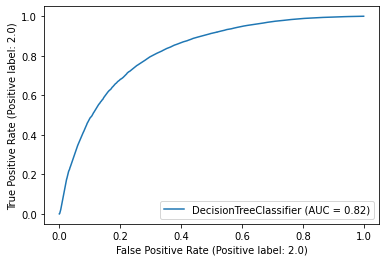

In [9]:
print(clf.best_estimator_)
print('Training performance:', accuracy_score(y, clf.best_estimator_.predict(X)))
print('Testing performance:', accuracy_score(y_test, clf.best_estimator_.predict(X_test)))
RocCurveDisplay.from_estimator(clf.best_estimator_, X_test, y_test)

In [10]:
# Evaluate the model with: Recall
parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf_recall = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='recall',
                   return_train_score=True,
                   n_jobs=10)
clf_recall.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='recall')

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5)
Training performance: 0.925081983100071
Testing performance: 0.794275424841505


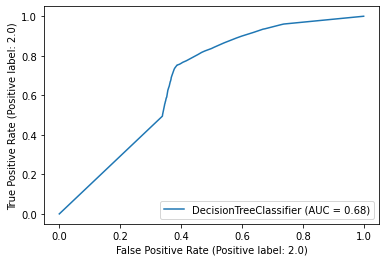

In [11]:
print(clf_recall.best_estimator_)
print('Training performance:', accuracy_score(y, clf_recall.best_estimator_.predict(X)))
print('Testing performance:', accuracy_score(y_test, clf_recall.best_estimator_.predict(X_test)))
RocCurveDisplay.from_estimator(clf_recall.best_estimator_, X_test, y_test)

In [12]:
# Evalute the model with: F1 score
parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf_f1 = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='f1',
                   return_train_score=True,
                   n_jobs=10)
clf_f1.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='f1')

DecisionTreeClassifier(max_depth=30, min_samples_leaf=30)
Training performance: 0.8662292150567551
Testing performance: 0.8369283865401208


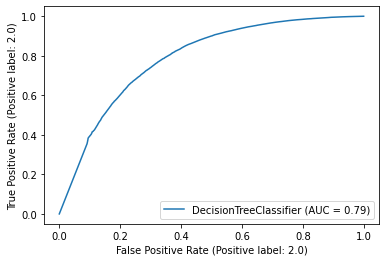

In [13]:
print(clf_f1.best_estimator_)
print('Training performance:', accuracy_score(y, clf_f1.best_estimator_.predict(X)))
print('Testing performance:', accuracy_score(y_test, clf_f1.best_estimator_.predict(X_test)))
RocCurveDisplay.from_estimator(clf_f1.best_estimator_, X_test, y_test)

In [14]:
import joblib

# Save the pretrained model
joblib.dump(clf, 'DST_acc_gridsearch.pkl')
joblib.dump(clf_recall, 'DST_recall_gridsearch.pkl')
joblib.dump(clf_f1, 'DST_f1_gridsearch.pkl')

['DST_f1_gridsearch.pkl']